# Blatt03_Spiele

Games.02: Optimale Spiele: Minimax und alpha-beta-Pruning

In [8]:
import math

#
# Alle möglichen kombinationen, in welchen die Zeichen angeordnet sind, um drei in einer Reihe/Spalte/Diagonalen
# Werden verwendet um diese im Terminal-Test nach Siegern zu sehen
#

win_combos = [
    [0, 1, 2], [3, 4, 5], [6, 7, 8],
    [0, 3, 6], [1, 4, 7], [2, 5, 8],
    [0, 4, 8], [2, 4, 6]
]

# Das Spielfeld wird als eindimensionales Array dargestellt,
# da so die win_combos sehr viel leichter getestet werden können
#
# ein '-' stellt ein leeres Feld dar, besetzte Felder werden mir X oder O gefüllt
table = ["-", "-", "-", "-", "-", "-", "-", "-", "-"]

def Terminal_Test(state):
  for combinations in win_combos:

    if(state[combinations[0]] == state[combinations[1]] == state[combinations[2]]):

      if(state[combinations[0]] == "X"):
        return 1
      elif(state[combinations[0]] == "O"):
        return -1

    if("-" not in state):   #kein freier Wert mehr zu füllen im Feld, terminiert deshalb
      return 0

    return None     # state terminiert noch nicht


def Max_Value(state, alpha, beta):

  # entkommentiere den 'print' Befehl, um alle möglichen Spielzustände für den Max-Spieler anzuzeigen
  #
  # print(state)


  util = Terminal_Test(state)
  if (util is not None):
    return util

  v = -math.inf
  for i in range(len(state)):

    temp = state.copy()
    if(temp[i] == "-"):             # Rekursion wird nur mit geänderten Spielfeldern durchgeführt
      temp[i] = "X"
      v = max(v, Min_Value(temp, alpha, beta))

      # Pruning
      alpha = max(alpha, v)
      if beta <= alpha:
        break             # Restliche Teilbäume werden abgeschnitten

  return v


def Min_Value(state, alpha, beta):

  # entkommentiere den 'print' Befehl, um alle möglichen Spielzustände für den Min-Spieler anzuzeigen
  #
  # print(state)

  util = Terminal_Test(state)
  if (util is not None):
    return util

  v = math.inf
  for i in range(len(state)):

    temp = state.copy()
    if(temp[i] == "-"):             # Rekursion wird nur mit geänderten Spielfeldern durchgeführt
      temp[i] = "O"
      v = min(v, Max_Value(temp, alpha, beta))

      # Pruning
      beta = min(beta, v)
      if beta <= alpha:
        break             # Restliche Teilbäume werden abgeschnitten

  return v

out = Max_Value(table, -math.inf, math.inf)
print(out)


0


**c)**

Der Unterschied in besuchten Knoten ist sehr Groß, wobei ein Durchlauf ohne Pruning die Maximale Anzeigelänge von 5000 Zeilen erreicht hat und anscheinlich der Letzten darstellung noch sehr viel mehr Zustände besucht hat. Der Code mit Pruning hat das Anzeigelimit jedoch nicht erreicht.

Es liegt hier ein so großer unterschied vor, weil in Tic Tac Toe viele verschiedenene mögliche knoten entstehen, welche jedoch nur 1, -1 und 0 zurückgeben können, was dazu führt, dass vergleichsweise schnell ein 'bester wert' für einen Spieler gefunden werden kann.

Games.03: Minimax vereinfachen

In [ ]:

# 'player' beschreibt hier einen Zahlenwert, der eintweder 1 oder -1 ist
#
# 'player' dient, um die ergebnisse dem aktuellem Spieler anzupassen
#
def minimax(state, player):
  if Terminal-Test(state): return Utility(state)

  v = player * +INF

  if(player == 1):
    for (a, s) in Successors(state):
      v = MAX(v, minimax(s, -player))

    return v

  else:
    for (a, s) in Successors(state):
      v = MIN(v, minimax(s, -player))

    return v

Suchbaum, an dem getestet wird:

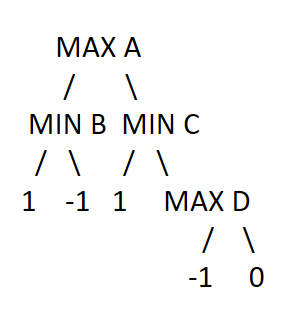

Für min-Value und max-Value:

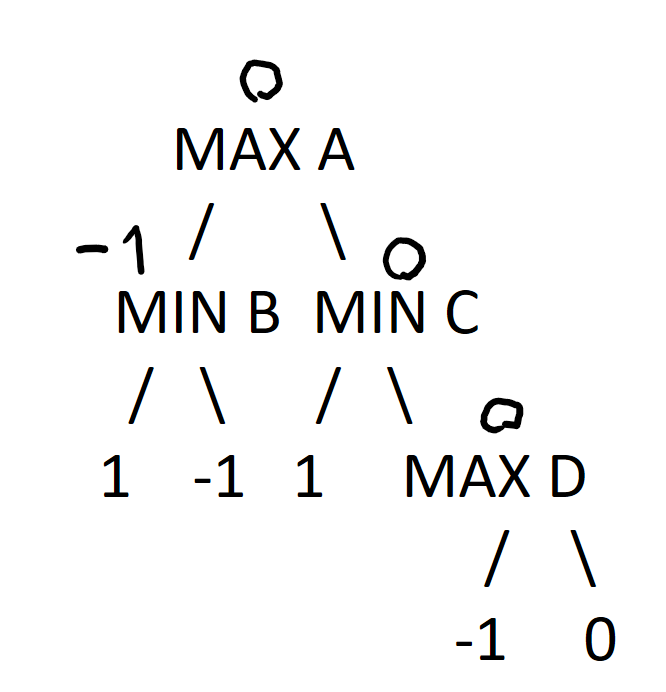

Für minimax:

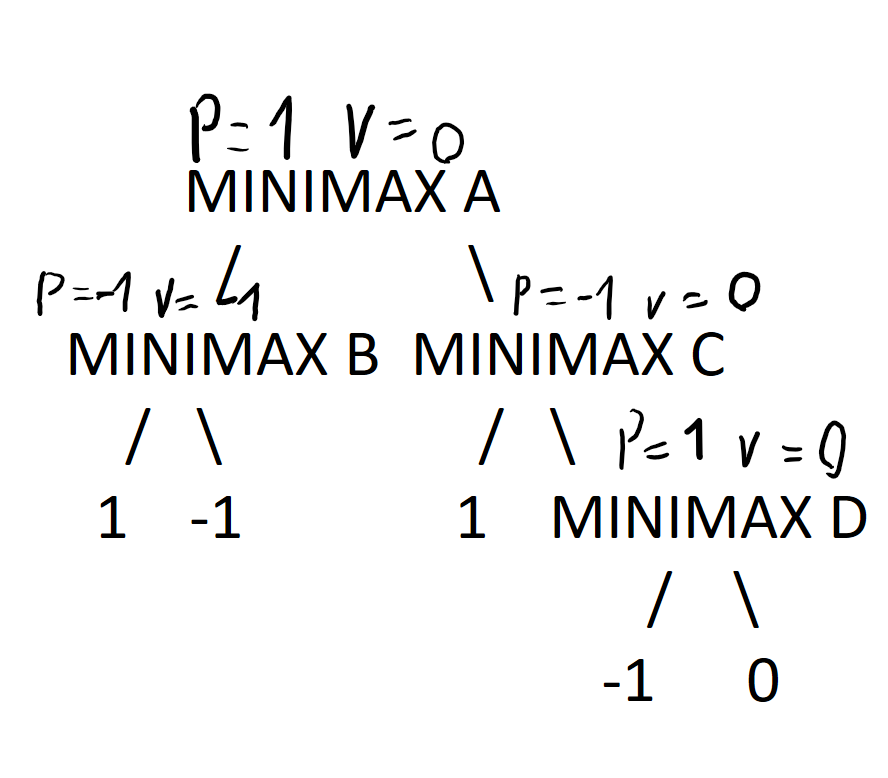